# LAB: 14 Data Visualization
## Nizar Alsaeed
we will load the data of four wind power stations in Germany to compare and analyze them.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
df_50H = pd.read_csv('../input/wind-power-generation/50Hertz.csv')
df_AM = pd.read_csv('../input/wind-power-generation/Amprion.csv')
df_TS = pd.read_csv('../input/wind-power-generation/TenneTTSO.csv')
df_TB = pd.read_csv('../input/wind-power-generation/TransnetBW.csv')
df_50H

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,23/08/2019,74,73,63,55,54,53,51,52,45,...,68,68,63,61,57,52,51,49,45,40
1,24/08/2019,37,38,35,35,31,32,30,29,28,...,118,118,112,107,104,104,99,95,95,96
2,25/08/2019,93,88,85,81,76,80,81,76,73,...,111,108,103,96,93,88,86,82,80,77
3,26/08/2019,72,66,59,54,48,46,45,43,42,...,48,47,47,46,47,49,50,51,48,42
4,27/08/2019,39,38,36,36,34,31,31,30,31,...,54,53,51,52,51,52,54,54,56,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,18/09/2020,73,72,66,62,59,58,54,53,52,...,80,75,73,75,73,73,70,66,64,65
393,19/09/2020,64,64,64,68,66,66,67,70,70,...,149,149,150,147,146,141,139,131,127,122
394,20/09/2020,111,102,95,87,82,83,80,75,72,...,109,105,104,95,89,81,73,69,66,57
395,21/09/2020,57,53,47,44,43,42,42,45,45,...,82,78,76,75,72,68,65,62,59,55


In [4]:
print(df_50H.info(), df_50H.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 97 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      397 non-null    object
 1   00:00:00  397 non-null    int64 
 2   00:15:00  397 non-null    int64 
 3   00:30:00  397 non-null    int64 
 4   00:45:00  397 non-null    int64 
 5   01:00:00  397 non-null    int64 
 6   01:15:00  397 non-null    int64 
 7   01:30:00  397 non-null    int64 
 8   01:45:00  397 non-null    int64 
 9   02:00:00  397 non-null    int64 
 10  02:15:00  397 non-null    int64 
 11  02:30:00  397 non-null    int64 
 12  02:45:00  397 non-null    int64 
 13  03:00:00  397 non-null    int64 
 14  03:15:00  397 non-null    int64 
 15  03:30:00  397 non-null    int64 
 16  03:45:00  397 non-null    int64 
 17  04:00:00  397 non-null    int64 
 18  04:15:00  397 non-null    int64 
 19  04:30:00  397 non-null    int64 
 20  04:45:00  397 non-null    int64 
 21  05:00:00  397 no

#### calculating the total generation by sum of all rows

In [5]:
df_date = pd.to_datetime(df_50H['Date'])

df_50H['Total_Generation'] = df_50H.sum(axis=1)
df_AM['Total_Generation'] = df_AM.sum(axis=1)
df_TS['Total_Generation'] = df_TS.sum(axis=1)
df_TB['Total_Generation'] = df_TB.sum(axis=1)

#### We notice that the TenneTTSO is the largest wind station here as shown in the figure

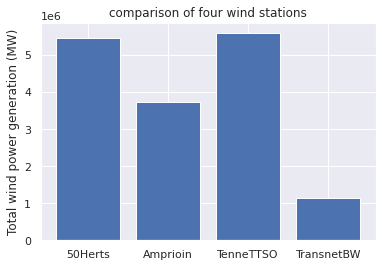

In [6]:

plt.bar(['50Herts', 'Amprioin', 'TenneTTSO', 'TransnetBW'],[df_50H['Total_Generation'].sum(), df_AM['Total_Generation'].sum(), df_TS['Total_Generation'].sum(), df_TB['Total_Generation'].sum()])
plt.title('comparison of four wind stations')
plt.ylabel('Total wind power generation (MW)')
plt.show()

#### Now, let's create a new dataframe which contains the date object and the total generaton of the largest wind station

In [7]:
df = list(zip(df_date, df_TS['Total_Generation']))
df = pd.DataFrame(df, columns = ['Date', 'Total_Generation'])
df

,Date,Total_Generation
0,2019-08-23,2655.76
1,2019-08-24,6567.33
2,2019-08-25,3501.63
3,2019-08-26,3402.77
4,2019-08-27,3346.76
...,...,...
392,2020-09-18,9707.77
393,2020-09-19,8486.14
394,2020-09-20,5639.60
395,2020-09-21,1647.75


### at which month the generation is the maximum?
#### to answer such question we have to group the generation per month and convert months to strings

In [8]:
generation_per_month = df.groupby(df['Date'].dt.strftime('%B'))['Total_Generation'].sum().sort_values()
generation_per_month

Date
July         239275.11
June         305175.31
May          344678.60
August       365535.71
April        406457.87
September    480810.28
October      481448.74
March        487347.16
November     509835.52
December     586681.89
January      604657.31
February     779350.02
Name: Total_Generation, dtype: float64

In [9]:
generation_per_month.max()

779350.0199999999

#### so, it seems that February is the most windy month in Germany

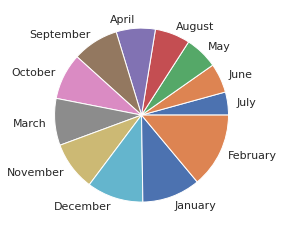

In [10]:
plt.pie(generation_per_month,labels=generation_per_month.keys())
plt.show()

### conclusion:
#### we compared four stations data and picked up the largest one of them, and then analyzed 
#### it to see which month has the strongest wind in the year in Germany, we found it to be February. 